## Poland Economy 2021 - overview (The World Bank datasets)


Author: Piotr Zawodnik / source:The World Bank data.

To access all WorldBank datasets:
https://data.worldbank.org/  install a new package: "pip install wbgapi"
reference info: url: https://blogs.worldbank.org/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data
and: https://pypi.org/project/wbgapi/

In [2]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Navigation map/:

wb.source.info() - all datasets
wb.series.info() - check all value options and select ID / wb.series.info(q='Trade')   - search database for a specific words
wb.economy.info() / wb.economy.info(q='poland') - search database for country/region IDs
wb.topic.info()  - check and select data for a specified topic.
wb.topic.members(number) - Select topic: ex. 3 - Economy & Growth
wb.region.info() - Check abbrev. for regions

wb.series.metadata.get('FP.CPI.TOTL.ZG') - Put series ID to understand source/info/all details. 

## 1. General Economic Data - Poland 

In [19]:
# 1 - Poland - Economy (topic: 3)  3 YEARS data 2019-2021
pd.options.display.float_format = '{:,.2f}'.format # format values
economy = wb.data.DataFrame(wb.topic.members(3), 'POL', time=range(2019,2022), labels = True).dropna(how = "any").round(2)
#save to excel file and check all available metrics/ code:  economy.to_excel(r'C:\Users\Admin\economy_POL.xlsx')
economy.rename(columns={'Series': 'Economy_metric'}, inplace=True)
economy.head(5) # check all available metrics for Economy section.

,Economy_metric,YR2019,YR2020,YR2021
series,,,,
BM.GSR.INSF.ZS,Insurance and financial services (% of service...,4.64,4.90,4.81
NE.GDI.FTOT.CN,Gross fixed capital formation (current LCU),"419,543,000,000.00","386,266,000,000.00","432,928,000,000.00"
NE.RSB.GNFS.CN,External balance on goods and services (curren...,"109,073,000,000.00","158,054,000,000.00","109,272,000,000.00"
NV.SRV.TOTL.ZS,"Services, value added (% of GDP)",57.62,57.84,55.61
NE.CON.GOVT.ZS,General government final consumption expenditu...,18.02,19.20,18.38


###### BASIC ECONOMY METRICS FOR POLAND:

In [28]:
# Select some basic economic indicators.
mask1 = economy["Economy_metric"] == "GDP per capita (current US$)"
mask2 = economy["Economy_metric"] == "GDP per capita growth (annual %)"
mask3 = economy["Economy_metric"] == "Exports of goods and services (annual % growth)"
mask4 = economy["Economy_metric"] == "Imports of goods and services (annual % growth)"
mask5 = economy["Economy_metric"] == "Current account balance (% of GDP)"

economy[mask1 | mask2 | mask3 | mask4 | mask5]

,Economy_metric,YR2019,YR2020,YR2021
series,,,,
NE.EXP.GNFS.KD.ZG,Exports of goods and services (annual % growth),5.19,0.13,11.97
NY.GDP.PCAP.CD,GDP per capita (current US$),"15,732.20","15,742.45","17,840.92"
BN.CAB.XOKA.GD.ZS,Current account balance (% of GDP),0.47,2.90,-0.58
NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),4.77,-2.37,6.06
NE.IMP.GNFS.KD.ZG,Imports of goods and services (annual % growth),3.05,-1.15,17.45


## 2. GDP and inflation - measured by CPI index

In [26]:
#1 Find a proper dataset for inflation - I will use CPI index as the measurement of consumer goods inflation, dateset ID: FP.CPI.TOTL.ZG
wb.series.info(q = "inflation")

id,value
FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
,3 elements


In [24]:
#This will provide detailed info about CPI (Consumer Price Index) inflation dataset
wb.series.metadata.get('FP.CPI.TOTL.ZG')

Field,Value
Aggregationmethod,Median
IndicatorName,"Inflation, consumer prices (annual %)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,"Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used."
Periodicity,Annual
Source,"International Monetary Fund, International Financial Statistics and data files."
Topic,Financial Sector: Exchange rates & prices


In [27]:
#2 Find a dataset for GDP - I will use "GDP per capita growth (annual %)", ID: NY.GDP.PCAP.KD.ZG 
wb.series.info(q = "GDP")

id,value
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (constant LCU)
NY.GDP.MKTP.CD,GDP (current US$)


###### GDP growth (annual %)  & CPI - consumer prices (annual %)

In [30]:
#GDP & CPI % growth: 5 YEARS trend: Poland compared to the European Union and other regions.
GDP_CPI = wb.data.DataFrame(['NY.GDP.PCAP.KD.ZG', "FP.CPI.TOTL.ZG"], economy = ["POL", "EUU", "CEB", "NAC", "WLD" ], time=range(2017,2023,1), labels=True).round(2).sort_index()
GDP_CPI

Country  \
economy series                                              
CEB     FP.CPI.TOTL.ZG     Central Europe and the Baltics   
        NY.GDP.PCAP.KD.ZG  Central Europe and the Baltics   
EUU     FP.CPI.TOTL.ZG                     European Union   
        NY.GDP.PCAP.KD.ZG                  European Union   
NAC     FP.CPI.TOTL.ZG                      North America   
        NY.GDP.PCAP.KD.ZG                   North America   
POL     FP.CPI.TOTL.ZG                             Poland   
        NY.GDP.PCAP.KD.ZG                          Poland   
WLD     FP.CPI.TOTL.ZG                              World   
        NY.GDP.PCAP.KD.ZG                           World   

                                                          Series  YR2017  \
economy series                                                             
CEB     FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)    2.08   
        NY.GDP.PCAP.KD.ZG       GDP per capita growth (annual %)    5.14   
EUU     FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)    1.43   
        NY.GDP.PCAP.KD.ZG       GDP per capita growth (annual %)    2.66   
NAC     FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)    1.86   
        NY.GDP.PCAP.KD.ZG       GDP per capita growth (annual %)    1.61   
POL     FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)    2.08   
        NY.GDP.PCAP.KD.ZG       GDP per capita growth (annual %)    4.82   
WLD     FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)    2.19   
        NY.GDP.PCAP.KD.ZG       GDP per capita growth (annual %)    2.20   

                           YR2018  YR2019  YR2020  YR2021  
economy series                                             
CEB     FP.CPI.TOTL.ZG       2.53    2.66    1.67    3.84  
        NY.GDP.PCAP.KD.ZG    4.70    4.21   -3.56    6.09  
EUU     FP.CPI.TOTL.ZG       1.74    1.63    0.50    2.55  
        NY.GDP.PCAP.KD.ZG    1.90    1.76   -6.01    5.51  
NAC     FP.CPI.TOTL.ZG       2.36    1.88    0.98    4.05  
        NY.GDP.PCAP.KD.ZG    2.27    1.69   -4.49    5.41  
POL     FP.CPI.TOTL.ZG       1.81    2.23    3.37    5.06  
        NY.GDP.PCAP.KD.ZG    5.35    4.77   -2.37    6.06  
WLD     FP.CPI.TOTL.ZG       2.44    2.19    1.92    3.42  
        NY.GDP.PCAP.KD.ZG    2.14    1.53   -4.27    4.82

<AxesSubplot:title={'center':'GDP per capita growth (annual %)'}>

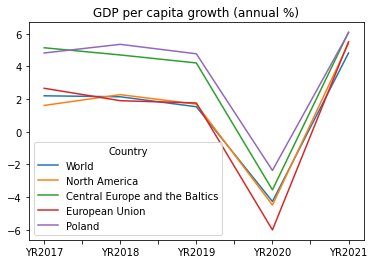

In [37]:
# GDP per capita growth % - PLOT
wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', economy = ["POL", "EUU", "CEB", "NAC", "WLD" ], time=range(2017,2023,1), labels=True).round(2).set_index("Country").transpose().plot(title = "GDP per capita growth (annual %)")

Output: All regions have experienced similar GDP per capita trend, though Poland and the Central European region (CEB) are leading with GDP per capita % growth at +6% annual growth in 2021. 

<AxesSubplot:title={'center':'Inflation, consumer prices (annual %)'}>

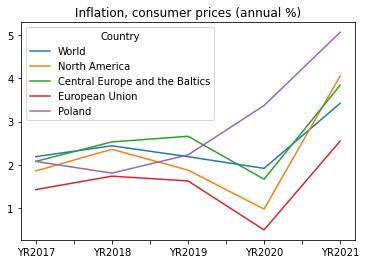

In [38]:
#Inflation (CPI), consumer prices (annual %) - PLOT
wb.data.DataFrame('FP.CPI.TOTL.ZG', economy = ["POL", "EUU", "CEB", "NAC", "WLD" ], time=range(2017,2023,1), labels=True).round(2).set_index("Country").transpose().plot(title = "Inflation, consumer prices (annual %)")

Output: Basket of customer goods measured by CPI is getting more expensive in Poland (+5%) in 2021, than in other regions. 

###### CPI index trend (index 100 is set in 2010)

In [172]:
#Check Customer price index growth since 2010 index base for all European countires. 
CPI = wb.data.DataFrame('FP.CPI.TOTL',economy = wb.region.members('EUU'), time=range(2010,2023,1), labels=True).round(2)
#SORT OUT the EU countries based on the highest CPI index in 2021. the highest CPI = highest consumer goods inflation. 
CPI.sort_values(by = 'YR2021', ascending = False, ignore_index= True ).head(6)

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,Romania,100.00,105.79,109.32,113.67,114.89,114.20,112.44,113.95,119.22,123.78,127.04,133.46
1,Hungary,100.00,103.93,109.80,111.71,111.45,111.38,111.82,114.45,117.71,121.64,125.69,132.11
2,Estonia,100.00,104.98,109.11,112.15,112.03,111.47,111.64,115.46,119.42,122.14,121.60,127.26
3,Lithuania,100.00,104.13,107.35,108.47,108.58,107.62,108.60,112.64,115.68,118.38,119.80,125.41
4,Czech Republic,100.00,101.92,105.27,106.78,107.15,107.48,108.22,110.87,113.25,116.48,120.16,124.77
5,Poland,100.00,104.24,107.95,109.02,109.08,108.13,107.41,109.64,111.63,114.11,117.96,123.93


Output: Poland has the 6th highest CPI index in the EU region with CPI index at 123.9 in 2021 which means customer goods on average went up +23.9% since 2010 base. 

<AxesSubplot:title={'center':'CPI index evolution since 2010'}>

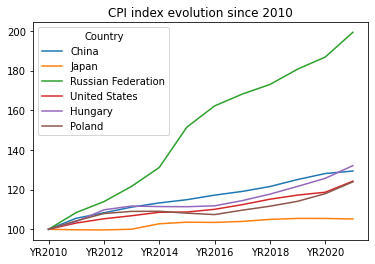

In [52]:
#CPI index trend since 2010 - PLOT: selected countries from other regions
CPI2 = wb.data.DataFrame('FP.CPI.TOTL',economy = ["POL", "GER", "HUN", "USA", "RUS", "JPN", "CHN" ], time=range(2010,2023,1), labels=True).round(2)

CPI2.set_index("Country").transpose().plot(title="CPI index evolution since 2010")

Output: CPI index in Poland (123.9 in 2021) is not exceptionally high compared to Russia, China and very similar to the US. 

,Series,YR2019,YR2020,YR2021
series,,,,
TM.VAL.FOOD.ZS.UN,Food imports (% of merchandise imports),8.86,9.46,8.33
BM.GSR.INSF.ZS,Insurance and financial services (% of service...,4.64,4.90,4.81
TX.VAL.SERV.CD.WT,Commercial service exports (current US$),"70,198,000,000.00","66,322,000,000.00","80,449,000,000.00"
BX.GSR.INSF.ZS,Insurance and financial services (% of service...,2.08,2.36,2.28
BM.GSR.TRVL.ZS,"Travel services (% of service imports, BoP)",21.33,13.17,11.65
TX.VAL.AGRI.ZS.UN,Agricultural raw materials exports (% of merch...,1.03,1.00,1.00
BX.GSR.NFSV.CD,"Service exports (BoP, current US$)","70,202,000,000.00","66,326,000,000.00","80,453,000,000.00"
NY.EXP.CAPM.KN,Exports as a capacity to import (constant LCU),"1,201,732,518,488.47","1,235,240,527,466.10","1,369,767,726,925.15"
BM.GSR.NFSV.CD,"Service imports (BoP, current US$)","43,492,000,000.00","40,285,000,000.00","49,212,000,000.00"


###### Dependence on IMPORT from other countries
DATA = EUU countries, year = 2021

In [ ]:
wb.series.info(q= "import") #navigate datasets

In [129]:
# Import of goods and services (% of GDP) +
# Import of agriculture mat.,food, fuel, manufacture goods, metals as % of import merchandise 
#European Union region (except. countries with no available data)
trade = wb.data.DataFrame(["NE.IMP.GNFS.ZS", "TM.VAL.FOOD.ZS.UN", "TM.VAL.FUEL.ZS.UN", "TM.VAL.MANF.ZS.UN", "TM.VAL.MMTL.ZS.UN", "TM.VAL.AGRI.ZS.UN"] , economy = wb.region.members('EUU'), time = 2021).dropna(how="any")
trade.columns = ["Import of goods & serv. (% of GDP)", "Agriculture raw mat.", "Food import (%)", "Fuel import (%)", "Manufactures, machinery & chemicals", "Metals"]
trade.head(5)

,Import of goods & serv. (% of GDP),Agriculture raw mat.,Food import (%),Fuel import (%),"Manufactures, machinery & chemicals",Metals
economy,,,,,,
AUT,55.04,2.00,7.43,5.23,75.14,4.40
BEL,84.01,1.08,9.20,13.61,70.09,5.71
CYP,79.94,0.57,15.29,18.42,63.51,1.04
CZE,69.53,1.03,5.57,5.70,83.79,3.37
DEU,41.93,1.27,7.75,8.66,71.55,5.24


In [105]:
#An average % import from all European Union countries
trade.mean()

Import of goods & serv. (% of GDP)    63.92
Agriculture raw mat.                   1.69
Food import                           10.01
Fuel                                  11.18
Manufactures, machinery & chemicals   70.45
Metals                                 3.79
dtype: float64

In [110]:
#Poland import dependency on others in %. 
trade.loc["POL"]

Import of goods & serv. (% of GDP)    56.71
Agriculture raw mat.                   1.43
Food import                            8.33
Fuel                                   6.25
Manufactures, machinery & chemicals   77.60
Metals                                 3.97
Name: POL, dtype: float64

Output: 
Poland's import is at 56% of GDP, which is less than an avarage country in the European Union (63%).
Poland is very little dependend on foregin fuel imports (6%) and import food supplies (8%). All European Union countries including Poland rely heavily on imported manufactured goods. 

##### IMPORT of food and fuel from the other countries - the EUU overview 

In [139]:
#create a copy of dataframe
food_fuel = trade.copy()
food_fuel = food_fuel.reset_index()

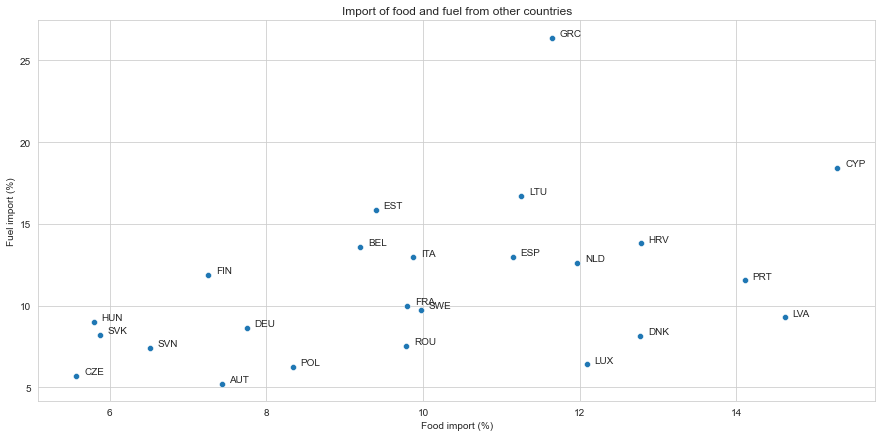

In [170]:
import seaborn as sns

plt.figure(figsize=(15,7))
plt.title("Import of food and fuel from other countries")
sns.set_style("whitegrid")
sns.scatterplot(data=food_fuel, x="Food import (%)", y="Fuel import (%)")
#Adding country's names. 
for i in range(food_fuel.shape[0]):
    plt.text(x=food_fuel["Food import (%)"][i]+0.1,y=food_fuel["Fuel import (%)"][i]+0.1, s=food_fuel["economy"][i])
    

Output: Poland has a strong independence when it comes to import of fuel and food supplies. Compared to other counties, Poland's % share of import for both fuel and food is insignificant. 